<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/environment/blob/main/climate_change_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is part of CS245 (Principles of Data Science) in Computer Science, Faculty of Science and Technology, Thammasat University which I am responsible for all coding. We will use the Environment Temperature Change dataset that contains the yearly temperature for many countries from 1961 to 2019.

### Import all required packages and load the data set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/환경/climate_change/Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin-1')

# Summary Information About Data Set

In [5]:
df.loc[:, ~df.columns.isin(['Area Code', 'Months Code', 'Element Code'])].describe()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,8287.000000,8322.000000,8294.000000,8252.000000,8281.000000,8364.000000,8347.000000,8345.00000,8326.000000,8308.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,0.402433,0.315527,0.317393,0.269382,0.217839,0.376419,0.263239,0.24487,0.382172,0.365322,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,0.701567,0.713777,0.853133,0.749216,0.739418,0.737370,0.725421,0.75490,0.725313,0.662412,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,-8.40700,-6.784000,-5.847000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,0.057000,-0.033000,0.030250,-0.102500,-0.214000,0.055000,-0.169000,-0.16400,0.171000,0.094000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,0.366000,0.333000,0.355000,0.326000,0.303000,0.360000,0.313000,0.31200,0.385000,0.367000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,0.676500,0.627000,0.647750,0.609000,0.584000,0.660250,0.601000,0.59500,0.677000,0.642000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,4.37300,4.411000,4.373000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

# Data Cleansing / Data Validity

In [9]:
print("Number of NaN values before filling :\n", df.isnull().sum().sort_values(ascending=False))

# Select only numeric columns before calculating the mean
numeric_df = df.select_dtypes(include=['number'])

# Fill NaN values in numeric columns with their respective means
df[numeric_df.columns] = numeric_df.fillna(numeric_df.mean())

print("\nNumber of NaN values after filling :\n", df.isnull().sum().sort_values(ascending=False))

Number of NaN values before filling :
 Area Code    0
Y2003        0
Y1989        0
Y1990        0
Y1991        0
            ..
Y1981        0
Y1982        0
Y1983        0
Y1984        0
Y2019        0
Length: 66, dtype: int64

Number of NaN values after filling :
 Area Code    0
Y2003        0
Y1989        0
Y1990        0
Y1991        0
            ..
Y1981        0
Y1982        0
Y1983        0
Y1984        0
Y2019        0
Length: 66, dtype: int64


In [10]:
print("Number of rows with all NaNs =", len(df[df.isnull().all(axis=1)]))

Number of rows with all NaNs = 0


In [11]:
print("Number of duplicate rows =", len(df[df.duplicated()]))

Number of duplicate rows = 0


# Data Wrangling

In [12]:
df = df.loc[df['Element'] == 'Temperature change']

In [13]:
df.drop(['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'], axis=1, inplace=True)

<ipython-input-13-7d3a9c089d25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'], axis=1, inplace=True)


In [14]:
df.replace(to_replace=r'Dec\x96Jan\x96Feb', value='Winter', regex=True, inplace=True)
df.replace(to_replace=r'Mar\x96Apr\x96May', value='Spring', regex=True, inplace=True)
df.replace(to_replace=r'Jun\x96Jul\x96Aug', value='Summer', regex=True, inplace=True)
df.replace(to_replace=r'Sep\x96Oct\x96Nov', value='Fall', regex=True, inplace=True)

<ipython-input-14-39a0927abe6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace=r'Dec\x96Jan\x96Feb', value='Winter', regex=True, inplace=True)
<ipython-input-14-39a0927abe6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace=r'Mar\x96Apr\x96May', value='Spring', regex=True, inplace=True)
<ipython-input-14-39a0927abe6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace=r'

In [15]:
df.rename(columns = {'Area':'country_name', 'Months':'months'}, inplace=True)

<ipython-input-15-a1c0c1e3e204>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Area':'country_name', 'Months':'months'}, inplace=True)


In [16]:
df = pd.melt(df, id_vars=['country_name', 'months'], var_name='year', value_name='temp_change')
df['year'] = [i.split('Y')[-1] for i in df.year]

In [17]:
df

,country_name,months,year,temp_change
0,Afghanistan,January,1961,0.777
1,Afghanistan,February,1961,-1.743
2,Afghanistan,March,1961,0.516
3,Afghanistan,April,1961,-1.709
4,Afghanistan,May,1961,1.412
...,...,...,...,...
284847,OECD,Winter,2019,1.527
284848,OECD,Spring,2019,1.352
284849,OECD,Summer,2019,1.078
284850,OECD,Fall,2019,1.233


# Data Visualization

### Top 10 Areas with The Highest Temperature Change

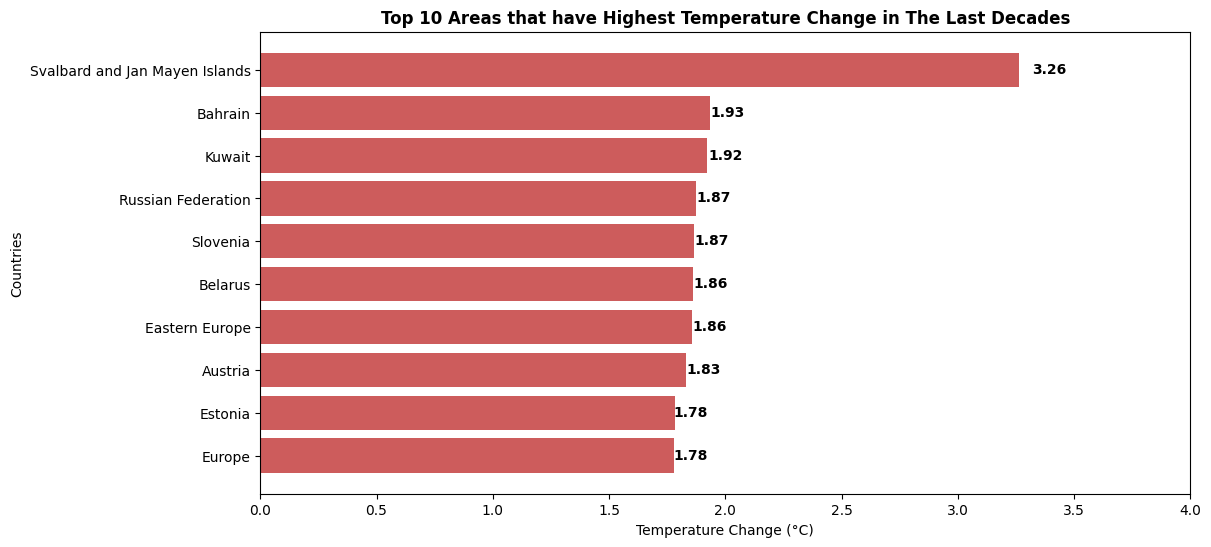

In [18]:
df1 = df.copy()
df1.set_index('year', inplace=True)
df1 = df1.loc[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
df1.reset_index(inplace=True)

df1 = df1.groupby(['country_name',]).agg({'temp_change':'mean'})
df1.reset_index(inplace=True)
df1 = df1.sort_values(by=['temp_change'], ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12,6))

bar1 = plt.barh(df1['country_name'], df1['temp_change'], color='indianred')

temp = round(df1['temp_change'], 2).to_list()

i = 0
for p in bar1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x + width * 1.04, y + height * 0.6, str(temp[i]), ha='center', weight='bold')
    i+=1

ax.set_xlim([0, 4.0])
ax.invert_yaxis()
plt.title("Top 10 Areas that have Highest Temperature Change in The Last Decades", weight='bold')
plt.xlabel("Temperature Change (°C)")
plt.ylabel("Countries")
plt.show()

The bar chart shows the average temperature change values of 10 areas that have the highest temperature change in the last decade. All countries on the list are industrialized countries, excluding Svalbard and Jan Mayen Islands. This area is near Europe and Russia and it is the arctic area that is greatly affected by climate change.

### Top 10 Areas with The Lowest Temperature Change

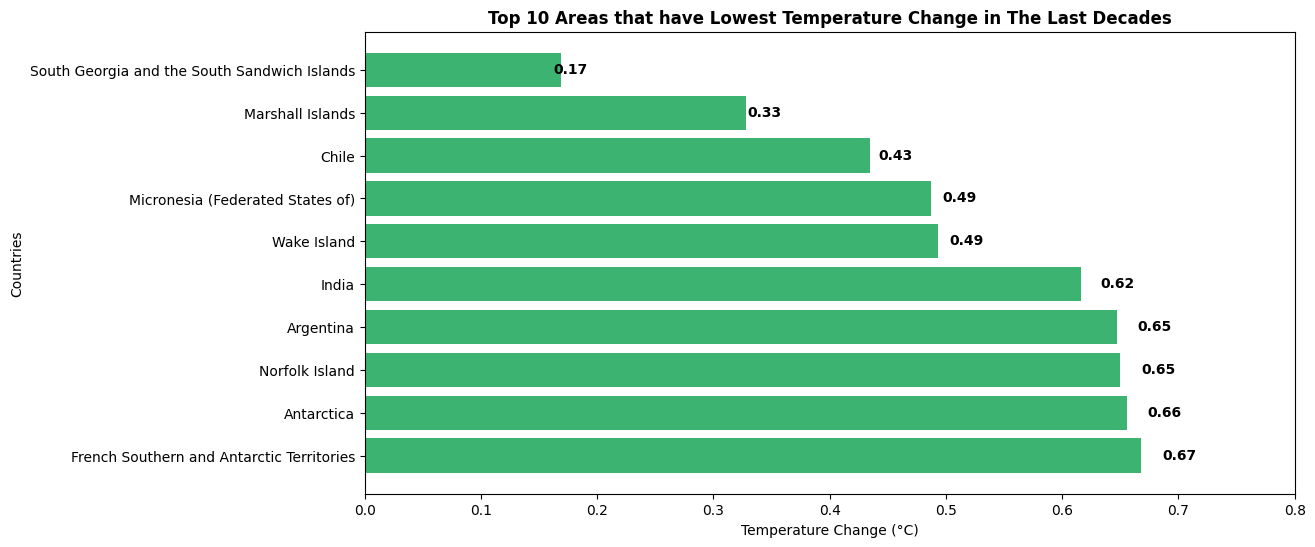

In [19]:
df2 = df.copy()
df2.set_index('year', inplace=True)
df2 = df2.loc[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
df2.reset_index(inplace=True)

df2 = df2.groupby(['country_name',]).agg({'temp_change':'mean'})
df2.reset_index(inplace=True)
df2 = df2.sort_values(by=['temp_change'], ascending=True).head(10)

fig, ax = plt.subplots(figsize=(12, 6))

bar2 = plt.barh(df2['country_name'], df2['temp_change'], color='mediumseagreen')

temp = round(df2['temp_change'], 2).to_list()

j = 0
for p in bar2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x + width * 1.05, y + height * 0.6, str(temp[j]), ha='center', weight='bold')
    j+=1

ax.set_xlim([0, 0.8])
ax.invert_yaxis()
plt.title("Top 10 Areas that have Lowest Temperature Change in The Last Decades", weight='bold')
plt.xlabel("Temperature Change (°C)")
plt.ylabel("Countries")
plt.show()

The bar chart shows the average temperature change values of 10 areas that have the lowest temperature change in the last decade. As we can see, there is no developed country on this list. Moreover, India is on this list. Even though India is a developing country and has lots of industrial activities. So, these activities may not have much effect on temperature changes.

### The Temperature Change in Svalbard and Jan Mayen Islands and South Georgia and the South Sandwich Islands

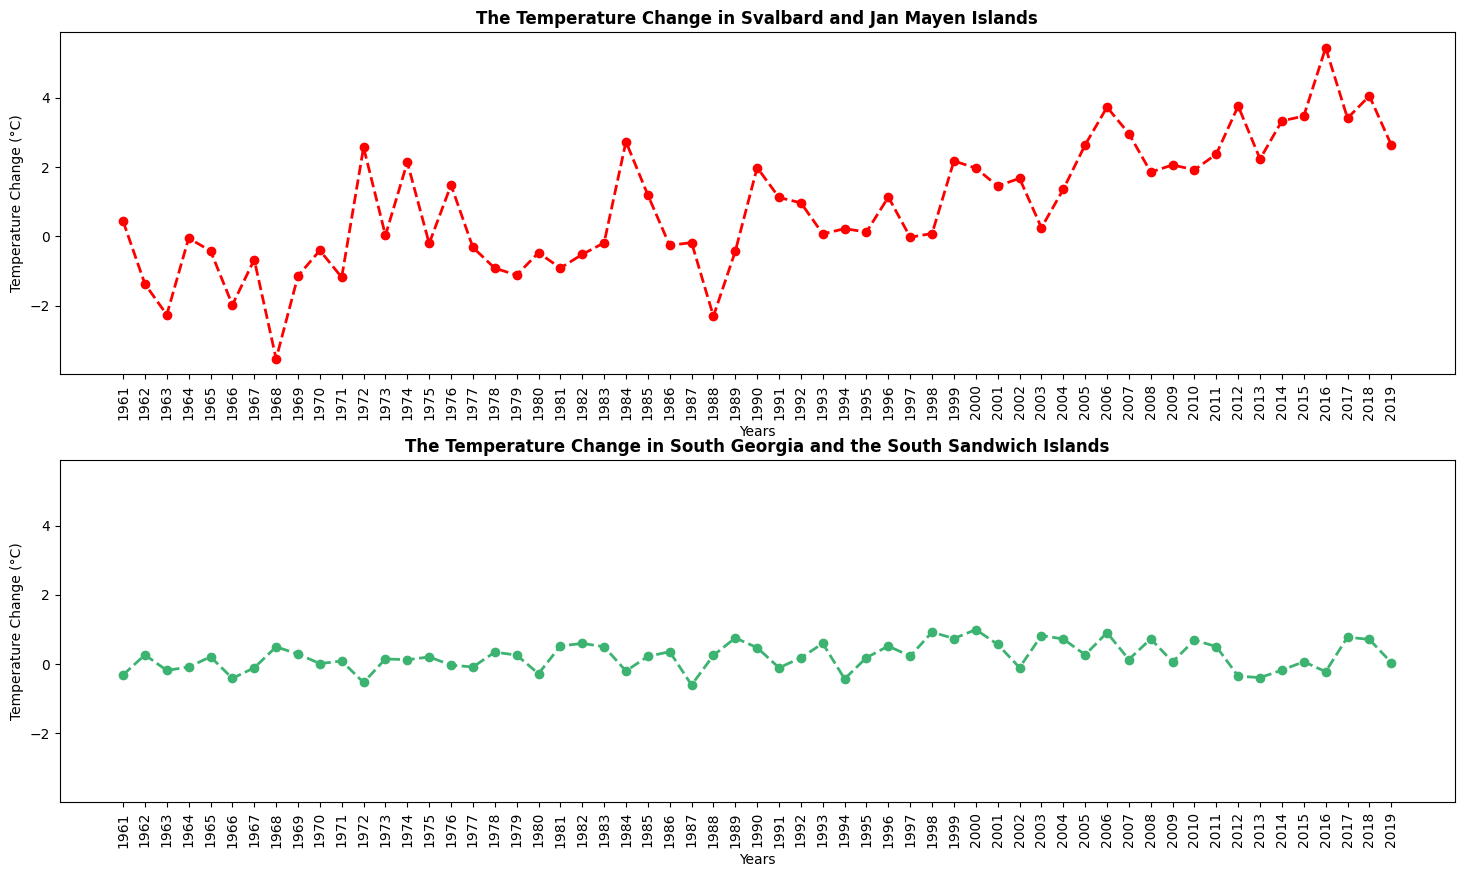

In [20]:
df3 = df[df['country_name'] == 'Svalbard and Jan Mayen Islands']
country1 = df3.groupby(['year',]).agg({'temp_change':'mean'})
country1.reset_index(inplace=True)
df4 = df[df['country_name'] == 'South Georgia and the South Sandwich Islands']
country2 = df4.groupby(['year',]).agg({'temp_change':'mean'})
country2.reset_index(inplace=True)

fig = plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.25)

ax1 = fig.add_subplot(211)
plt.xticks(rotation=90)
plt.plot(country1['year'], country1['temp_change'], 'o--', color='red', linewidth=2)
plt.title("The Temperature Change in Svalbard and Jan Mayen Islands", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")

ax2 = fig.add_subplot(212, sharey=ax1)
plt.xticks(rotation=90)
plt.plot(country2['year'], country2['temp_change'], 'o--', color='mediumseagreen', linewidth=2)
plt.title("The Temperature Change in South Georgia and the South Sandwich Islands", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")

plt.show()

The graph shows the trend of average temperature changing each year in Svalbard and Jan Mayen Islands and South Georgia and the South Sandwich Islands. The temperature change in Svalbard and Jan Mayen Islands fluctuation and tend to increase after 1990. On the other hand, the temperature change in South Georgia and the South Sandwich Islands is quite stable. There is no sharp increase or decrease.

### The Trend of Temperature Change between Annex I Countries and Non-Annex I Countries

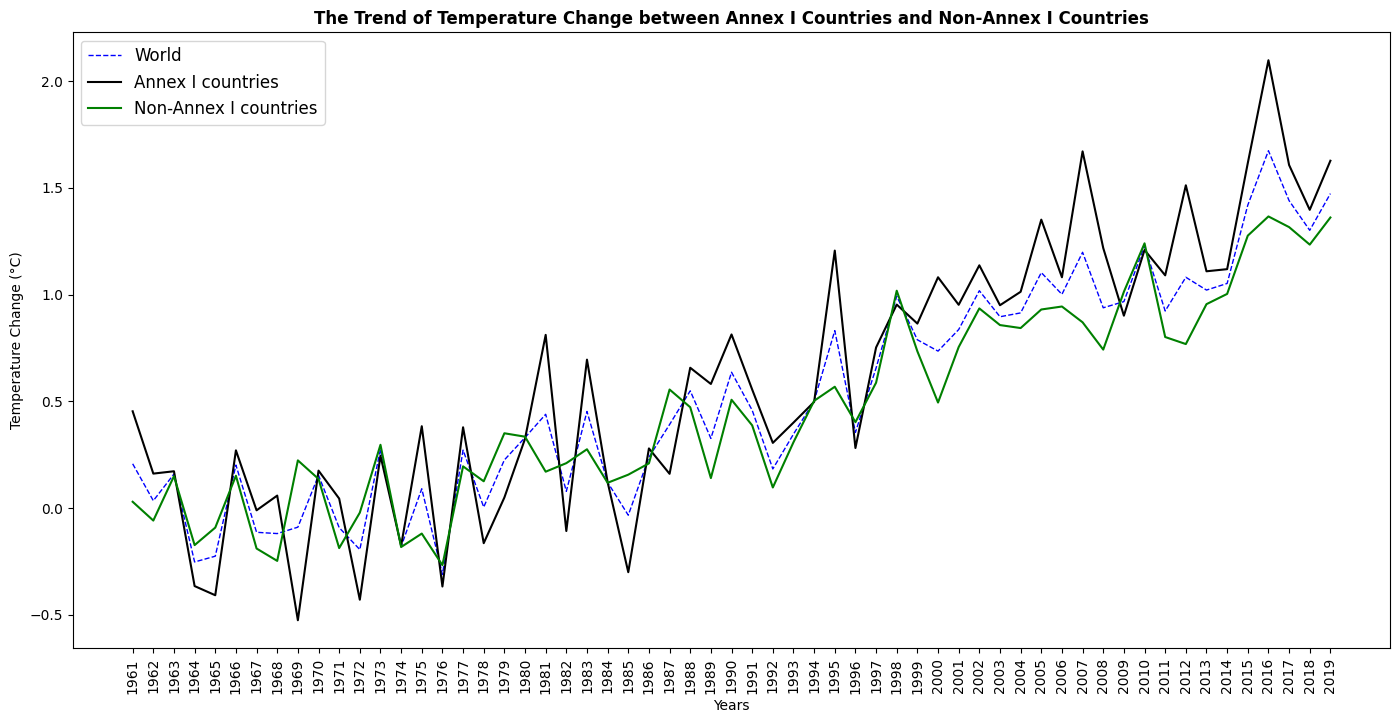

In [21]:
df5 = df[df['months'] == 'Meteorological year']
world = df5[df5['country_name'] == 'World']
annexI = df5[df5['country_name'] == 'Annex I countries']
non_annexI = df5[df5['country_name'] == 'Non-Annex I countries']

fig, ax = plt.subplots(figsize=(17, 8))

plt.plot(world['year'], world['temp_change'], '--', color='blue', label='World', linewidth=1)
plt.plot(annexI['year'], annexI['temp_change'], '-', color='black', label='Annex I countries')
plt.plot(non_annexI['year'], non_annexI['temp_change'], '-', color='green', label='Non-Annex I countries')

plt.xticks(rotation=90)
plt.legend(fontsize='large')
plt.title("The Trend of Temperature Change between Annex I Countries and Non-Annex I Countries", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")
plt.show()

As we can see, the average temperature in Annex I Countries (developing countries and underdeveloped countries) each year has relatively stable changes. But the average temperature in Non-Annex I Countries (developed countries or industrialized countries) has fluctuated changes.

### The Trend of Temperature Change in 4 Seasons

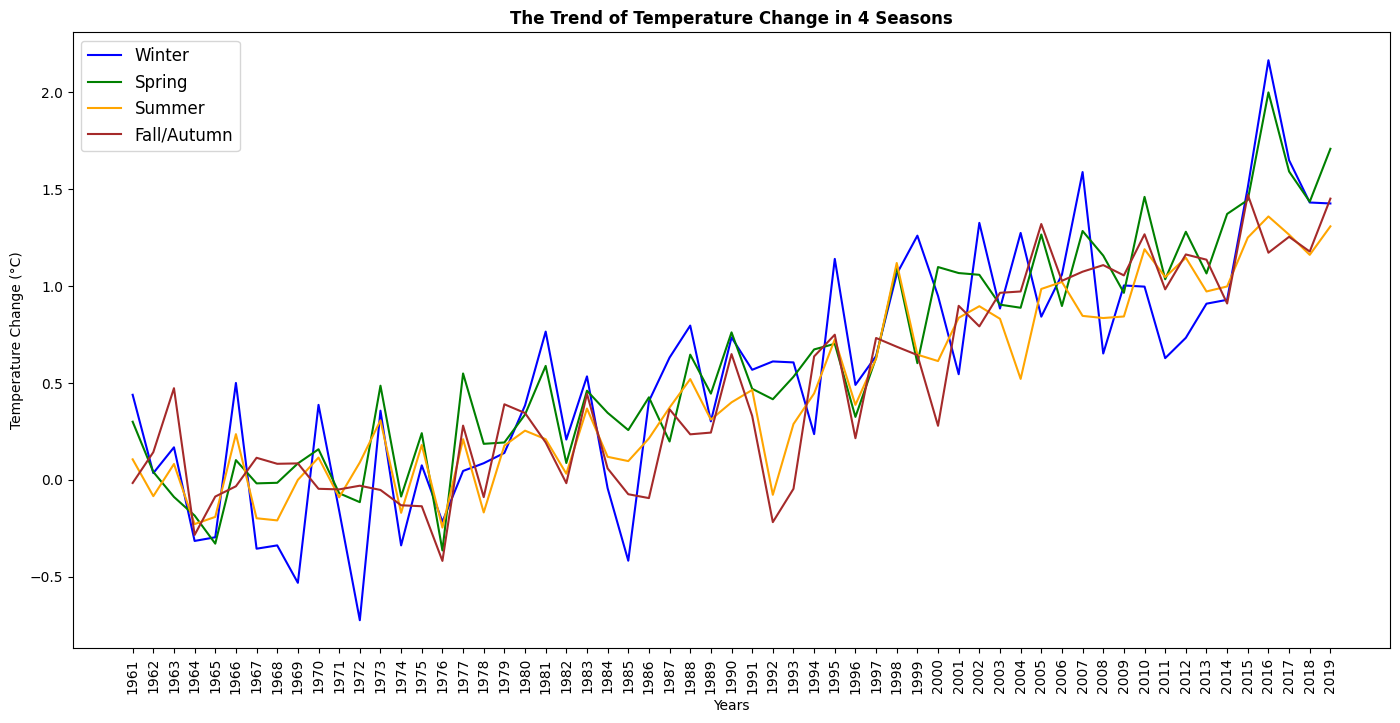

In [22]:
df6 = df[df['country_name'] == 'World']
winter = df6[df6['months'] == 'Winter']
spring = df6[df6['months'] == 'Spring']
summer = df6[df6['months'] == 'Summer']
fall = df6[df6['months'] == 'Fall']

fig, ax = plt.subplots(figsize=(17, 8))

plt.plot(winter['year'], winter['temp_change'], '-', color='blue', label='Winter')
plt.plot(spring['year'], spring['temp_change'], '-', color='green', label='Spring')
plt.plot(summer['year'], summer['temp_change'], '-', color='orange', label='Summer')
plt.plot(fall['year'], fall['temp_change'], '-', color='brown', label='Fall/Autumn')

plt.xticks(rotation=90)
plt.legend(fontsize='large')
plt.title("The Trend of Temperature Change in 4 Seasons", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")
plt.show()

This line chart compares the trend of temperature changes each year of 4 seasons: winter, spring, summer, and autumn. Summer has a relatively stable change same as Autumn, but Autumn fluctuation in the late 1980s until the early 1990s. Spring has a relatively volatile change. Winter has the most volatile change and a lot of peaks.

### Global Temperature Change Trends

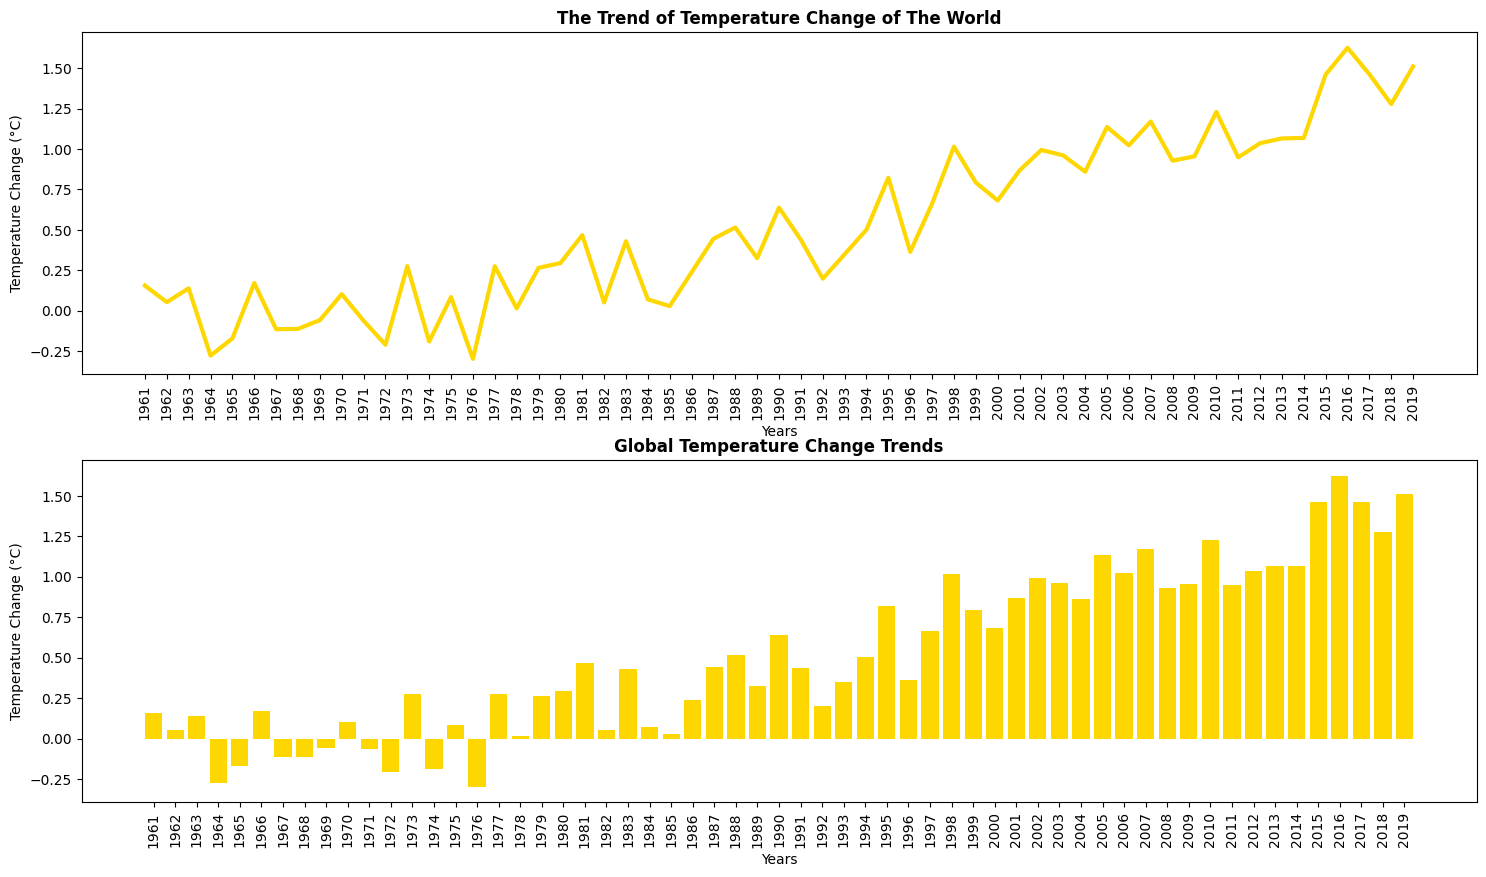

In [25]:
df7 = df[df['country_name'] == 'World']
# Select only the relevant columns before grouping
df7 = df7[['year', 'temp_change']].groupby(['year'], as_index=False).mean()

fig = plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.25)

ax1 = fig.add_subplot(211)
plt.plot(df7['year'], df7['temp_change'], '-', color='gold', linewidth=3)
plt.xticks(rotation=90)
plt.title("The Trend of Temperature Change of The World", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")

ax2 = fig.add_subplot(212)
plt.bar(df7['year'], df7['temp_change'], color='gold')
plt.xticks(rotation=90)
plt.title("Global Temperature Change Trends", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")

plt.show()

Both charts show the trend of global temperature change from 1961 to 2019. According to the chart, global temperature changes from 1961 to 1976 are very volatile. There is an unstable increase and decrease. From 1977 onwards, the average temperature does not decrease below 0°C and tends to increase significantly. In addition, 2016 has the highest temperature.

### Global Temperature Change Every 10 Years (1969-2019)

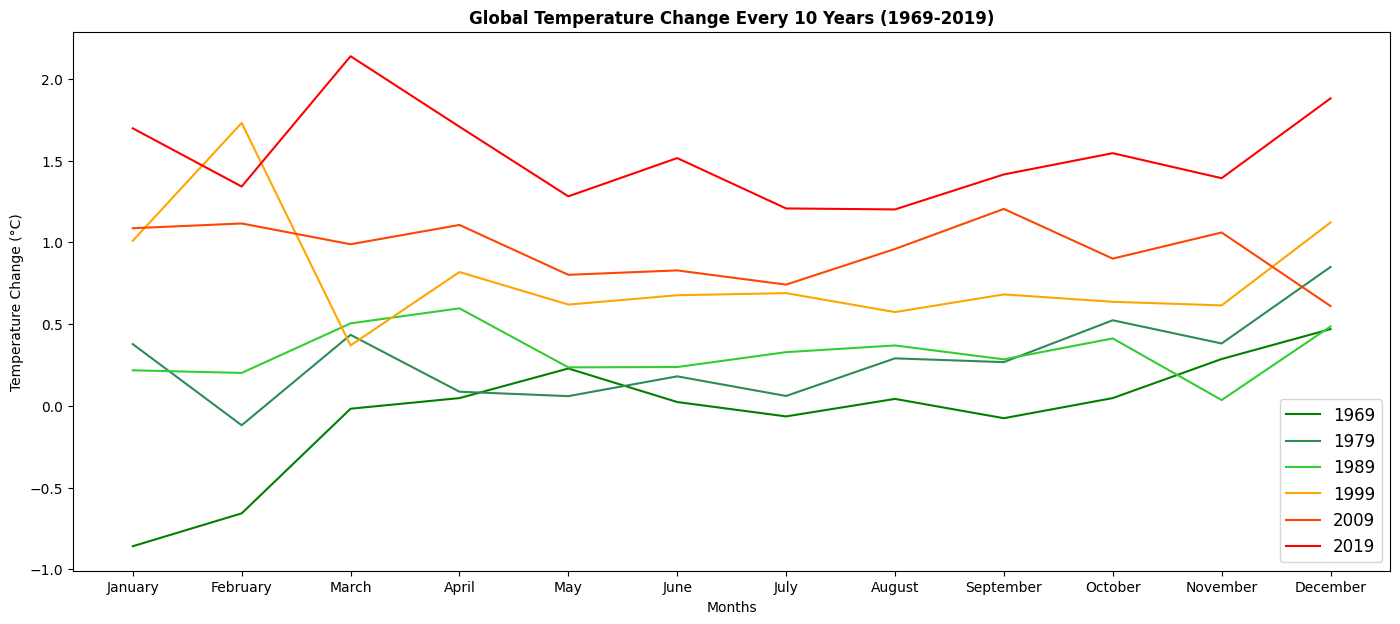

In [26]:
df8 = df[df['country_name'] == 'World']
y1969 = df8[df8['year'] == '1969'].head(12)
y1979 = df8[df8['year'] == '1979'].head(12)
y1989 = df8[df8['year'] == '1989'].head(12)
y1999 = df8[df8['year'] == '1999'].head(12)
y2009 = df8[df8['year'] == '2009'].head(12)
y2019 = df8[df8['year'] == '2019'].head(12)

fig, ax = plt.subplots(figsize=(17, 7))

plt.plot(y1969['months'], y1969['temp_change'], '-', color='green', label='1969')
plt.plot(y1979['months'], y1979['temp_change'], '-', color='seagreen', label='1979')
plt.plot(y1989['months'], y1989['temp_change'], '-', color='limegreen', label='1989')
plt.plot(y1999['months'], y1999['temp_change'], '-', color='orange', label='1999')
plt.plot(y2009['months'], y2009['temp_change'], '-', color='orangered', label='2009')
plt.plot(y2019['months'], y2019['temp_change'], '-', color='red', label='2019')

plt.legend(fontsize='large')
plt.title("Global Temperature Change Every 10 Years (1969-2019)", weight='bold')
plt.xlabel("Months")
plt.ylabel("Temperature Change (°C)")
plt.show()

This line chart compares the change in global temperature every 10 years. From the chart, the line of the temperature change each year gradually increases significantly.

### Thailand's Temperature Change Trend

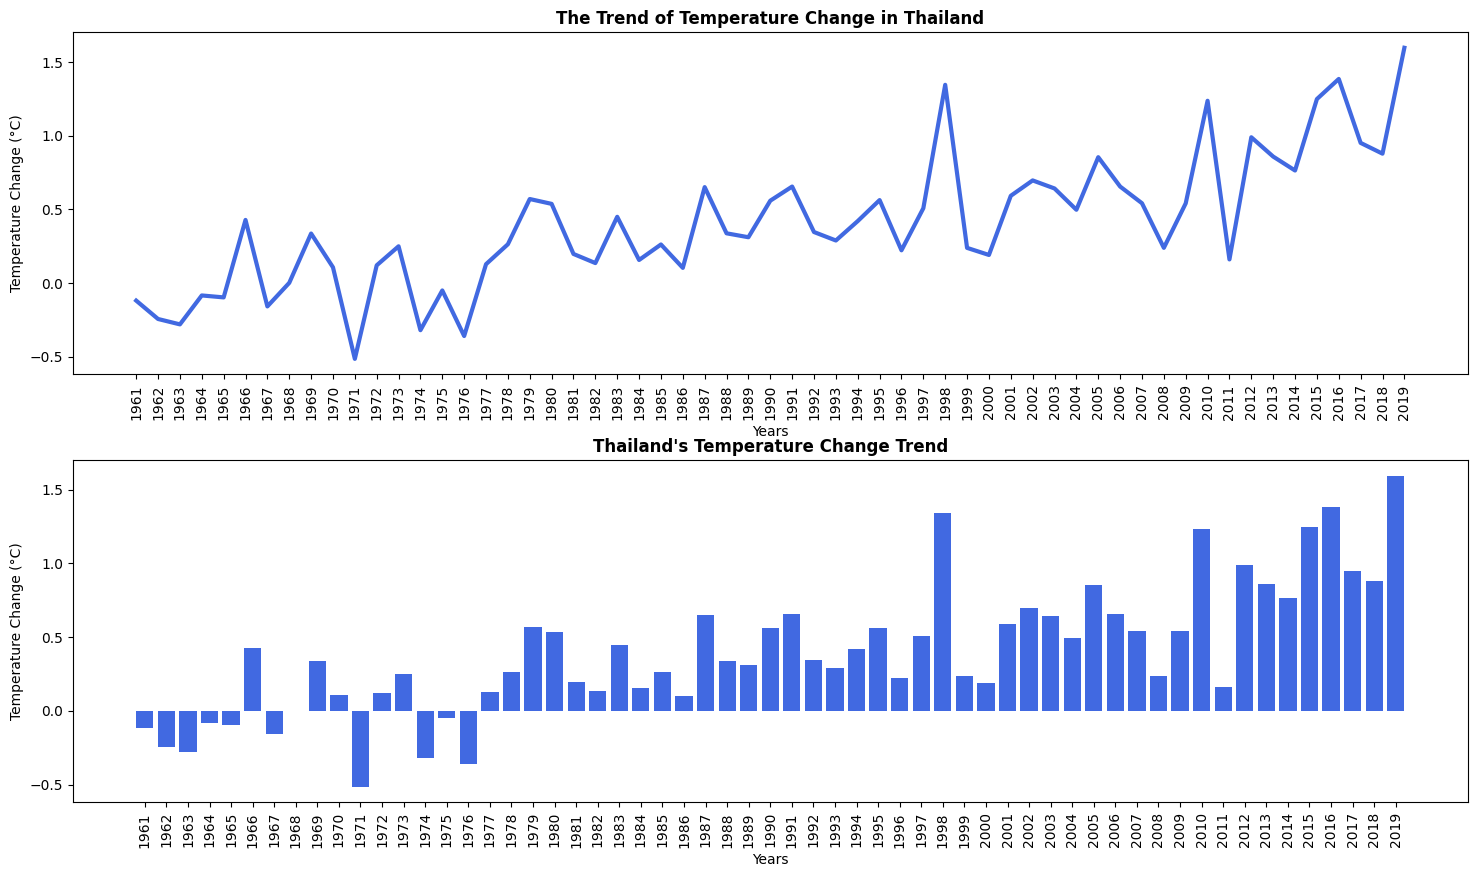

In [30]:
df9 = df[df['country_name'] == 'Thailand']
df9 = df9.groupby(['year'], as_index=False)['temp_change'].mean() # Select the 'temp_change' column for aggregation

fig = plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.25)

ax1 = fig.add_subplot(211)
plt.plot(df9['year'], df9['temp_change'], '-', color='royalblue', linewidth=3)
plt.xticks(rotation=90)
plt.title("The Trend of Temperature Change in Thailand", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")

ax2 = fig.add_subplot(212)
plt.bar(df9['year'], df9['temp_change'], color='royalblue')
plt.xticks(rotation=90)
plt.title("Thailand's Temperature Change Trend", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")

plt.show()

Both charts represent the trend of Thailand's temperature change from 1961 to 2019. From both charts, it can be seen that Thailand's temperature changes are very volatile. There is an unstable increase and decrease. From 1977 to 2019, the average temperature has not dropped below 0°C and there is a noticeable increase in trend. In addition, 2019 has the highest temperature.

### Thailand's Temperature Change Every 10 Years (1969-2019)

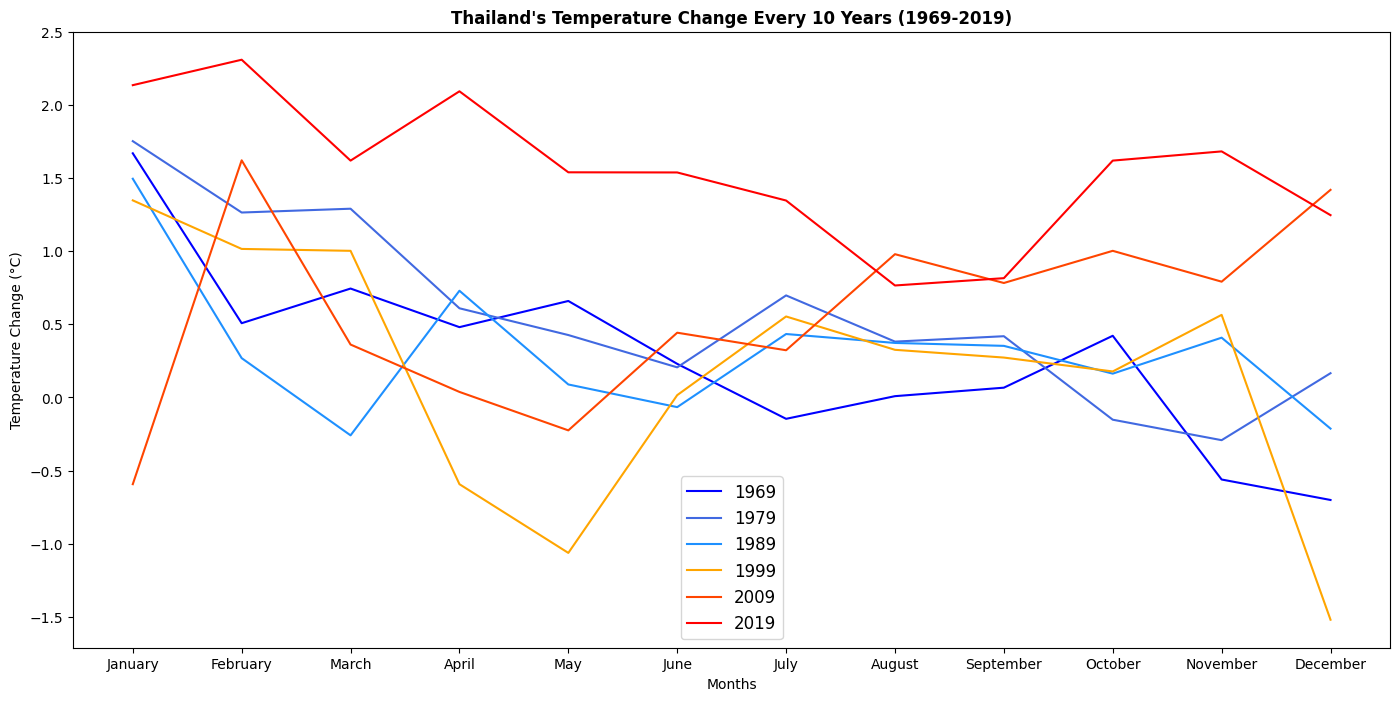

In [31]:
df10 = df[df['country_name'] == 'Thailand']
y1969 = df10[df10['year'] == '1969'].head(12)
y1979 = df10[df10['year'] == '1979'].head(12)
y1989 = df10[df10['year'] == '1989'].head(12)
y1999 = df10[df10['year'] == '1999'].head(12)
y2009 = df10[df10['year'] == '2009'].head(12)
y2019 = df10[df10['year'] == '2019'].head(12)

fig, ax = plt.subplots(figsize=(17, 8))

plt.plot(y1969['months'], y1969['temp_change'], '-', color='blue', label='1969')
plt.plot(y1979['months'], y1979['temp_change'], '-', color='royalblue', label='1979')
plt.plot(y1989['months'], y1989['temp_change'], '-', color='dodgerblue', label='1989')
plt.plot(y1999['months'], y1999['temp_change'], '-', color='orange', label='1999')
plt.plot(y2009['months'], y2009['temp_change'], '-', color='orangered', label='2009')
plt.plot(y2019['months'], y2019['temp_change'], '-', color='red', label='2019')

plt.legend(fontsize='large')
plt.title("Thailand's Temperature Change Every 10 Years (1969-2019)", weight='bold')
plt.xlabel("Months")
plt.ylabel("Temperature Change (°C)")
plt.show()

This line chart compares Thailand's temperature changes every 10 years and we can see that the temperature change is unstable. The temperature changes in 1969, 1979, 1989, and 2019 do not fluctuate much. On the other hand, The temperature change in 1999 and 2009 fluctuates throughout the year.